# Classification on Iris Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

In [6]:
X = iris.data
y = iris.target

In [7]:
X.shape, y.shape

((150, 4), (150,))

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
X.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [11]:
X.sample()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
120,6.9,3.2,5.7,2.3


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2
)

In [14]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

## Decision Tree (CART)

In [13]:
dtc = DecisionTreeClassifier(random_state=2)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
print(f"The Accuracy is {accuracy_score(y_test, y_pred_dtc)}")
print(confusion_matrix(y_test, y_pred_dtc))
print(classification_report(y_test, y_pred_dtc))

The Accuracy is 0.9333333333333333
[[14  0  0]
 [ 0  7  1]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.88      0.88         8
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



[Text(0.4, 0.9, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [36, 42, 42]\nclass = versicolor'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(0.5, 0.7, 'petal width (cm) <= 1.65\ngini = 0.5\nsamples = 84\nvalue = [0, 42, 42]\nclass = versicolor'),
 Text(0.2, 0.5, 'petal length (cm) <= 4.95\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]\nclass = versicolor'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = versicolor'),
 Text(0.3, 0.3, 'petal width (cm) <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(0.8, 0.5, 'petal length (cm) <= 4.85\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]\nclass = virginica'),
 Text(0.7, 0.3, 'sepal width (cm) <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica

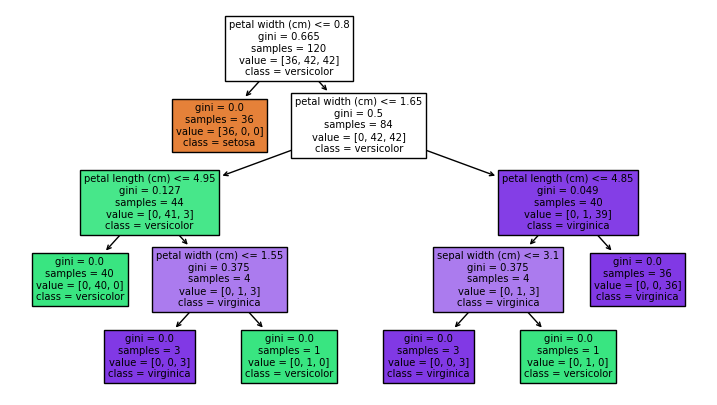

In [15]:
# Plot the decision tree

plt.figure(figsize=(9,5))
plot_tree(
    dtc,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names
)

## Rule Based Tree

In [17]:
from sklearn.tree  import export_text
tree_rules = export_text(dtc, feature_names=iris.feature_names)
print(tree_rules)

|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.65
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
print(f"Accuracy {accuracy_score(y_test, y_knn_pred) * 100}")
print(confusion_matrix(y_test, y_knn_pred))

Accuracy 100.0
[[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]


## Naive Bayes

In [23]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_gnb_pred = knn.predict(X_test)
print(f"Accuracy {accuracy_score(y_test, y_gnb_pred) * 100}")

Accuracy 100.0


## MLP

In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=2)
mlp.fit(X_train, y_train)
y_mlp_pred = mlp.predict(X_test)
print(f"Accuracy is {accuracy_score(y_test, y_mlp_pred) * 100}")

Accuracy is 100.0


## Model Comparision using CV

In [26]:
print("Model Comparison using Cross Validation")
classifiers = {
    "Decision Tree": dtc,
    "K-NN": knn,
    "Naive Bayes": gnb,
    "ANN": mlp
}

for name, clf in classifiers.items():
    scores = cross_val_score(
        clf,
        X_train,
        y_train,
        cv=5
    )
    
    print(f"{name} Accuracy is {scores.mean()} (+/- {scores.std()**2})")

Model Comparison using Cross Validation
Decision Tree Accuracy is 0.9666666666666668 (+/- 0.0009722222222222227)
K-NN Accuracy is 0.9666666666666668 (+/- 0.0002777777777777773)
Naive Bayes Accuracy is 0.95 (+/- 0.0023611111111111116)
ANN Accuracy is 0.9666666666666666 (+/- 0.0009722222222222227)


## Grid Search for KNN

In [29]:
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9, 11, 13, 15],
    "metric": ["eculidean", "manhattan", "minkowski"]
}

grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=param_grid_knn,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_knn.fit(X_train, y_train)
print("Best Parameter found for KNN are---")
print(grid_search_knn.best_params_)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best Parameter found for KNN are---
{'metric': 'minkowski', 'n_neighbors': 3}


In [31]:
param_grid_mlp = {
    "hidden_layer_sizes": [(10,), (50, ), (100, ), (10, 10), (50, 50), (100, 100)],
    "activation": ["tanh", "relu"],
    "solver": ["sgd", "adam"],
    "alpha": [0.0001, 0.001, 0.01, 0,1],
    "learning_rate": ["constant", "adaptive"]
}

grid_search_mlp = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid_mlp,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search_mlp.fit(X_train, y_train)
print("Best Parameter found for MLP are---")
print(grid_search_mlp.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameter found for MLP are---
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'sgd'}


In [34]:
best_mlp = grid_search_mlp.best_estimator_
best_mlp.fit(X_train, y_train)
y_pred_mlp = best_mlp.predict(X_test)

print(f"Accuracy for mlp: {accuracy_score(y_test, y_pred_mlp) * 100}")

Accuracy for mlp: 100.0
